# Analyse comparative de la tokenisation et des embeddings lexicaux appliquée aux documents Ecommerce

1. Importer mon  ecommerceDataset.txt depuis mon  local

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving ecommerceDataset.txt to ecommerceDataset.txt


In [ ]:
import pandas as pd

file_path = list(uploaded.keys())[0]

with open(file_path, 'r', encoding='utf-8') as f:
   # Read all lines and strip leading/trailing whitespace (including newlines)
    descriptions = [line.strip() for line in f.readlines() if line.strip()]

df = pd.DataFrame(descriptions, columns=["description"])

df.head(20)



,description
0,Household Paper Plane Design Framed Wall Han...
1,Household SAF 'Floral' Framed Painting (Wood...
2,Household SAF 'UV Textured Modern Art Print ...
3,Household SAF Flower Print Framed Painting (...
4,Household Incredible Gifts India Wooden Happ...
5,Pitaara Box Romantic Venice Canvas Painting 6m...
6,"Household photo, gifts, fabrics, balcony, in..."
7,Paper Plane Design Starry Night Vangoh Wall Ar...
8,Household prove raw canvas prints with speci...
9,Pitaara Box Romantic Venice Canvas Painting 6m...


In [ ]:
file_path = list(uploaded.keys())[0]

with open(file_path, 'r', encoding='utf-8') as f:
    text = f.read()

In [ ]:
import pandas as pd

# Lire le fichier TXT ligne par ligne
with open(file_path, "r", encoding="utf-8") as f:
    # Read all lines and strip leading/trailing whitespace (including newlines)
    descriptions = [line.strip() for line in f.readlines() if line.strip()]

df = pd.DataFrame(descriptions, columns=["description"])

df.head(20)

# **Préprocessing standard**

2. Installer les bibliothèques utiles

In [ ]:
!pip install nltk


Télécharger les ressources NLTK (stopwords…) :

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords

# Choisir la langue des stopwords
stop_words = set(stopwords.words('english'))   # si ton texte est en anglais
# stop_words = set(stopwords.words('french'))  # si texte en français

def clean_text(text):

    text = text.lower()                                           # minuscule
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)           # enlever URLs
    text = re.sub(r"[^a-z\s]", " ", text)                         # enlever chiffres & ponctuation & spéciaux
    text = re.sub(r"\s+", " ", text).strip()                      # enlever espaces multiples
    text = re.sub(r"\s*x\s*", " ", text)

    # enlever stopwords
    cleaned = " ".join([word for word in text.split() if word not in stop_words])

    return cleaned
cleaned_text = clean_text(text)
print(cleaned_text[:5000])


household paper plane design framed wall hanging motivational office decor art prints inch set painting made synthetic frame uv te tured print gives multi effects attracts towards household saf floral framed painting wood inch inch special effect uv print te tured sao painting made synthetic frame uv te tured print gives multi effects attracts towards household saf uv te tured modern art print framed painting synthetic cm cm cm set color multicolor size cm cm cm overview beautiful painting involves action skill using paint th household saf flower print framed painting synthetic inch inch uv te tured set sanfsw color multicolor size cm cm cm beautiful painting involves action skill using paint household incredible gifts india wooden happy birthday unique personalized gift inch size made natural imported wood quite solid light particle pattern soft pale blond colour upl pitaara bo romantic venice canvas painting mm thick mdf frame inch enclosure material mdf mount frame size inch inch cm

Notre corpus cleaned est maintenant prêt pour l’étape suivante → ** la tokenisation**

# Word **Tokenization**

Tokenisation simple avec NLTK (classique)

In [ ]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(cleaned_text)
tokens[:50]


['household',
 'paper',
 'plane',
 'design',
 'framed',
 'wall',
 'hanging',
 'motivational',
 'office',
 'decor',
 'art',
 'prints',
 'inch',
 'set',
 'painting',
 'made',
 'synthetic',
 'frame',
 'uv',
 'te',
 'tured',
 'print',
 'gives',
 'multi',
 'effects',
 'attracts',
 'towards',
 'household',
 'saf',
 'floral',
 'framed',
 'painting',
 'wood',
 'inch',
 'inch',
 'special',
 'effect',
 'uv',
 'print',
 'te',
 'tured',
 'sao',
 'painting',
 'made',
 'synthetic',
 'frame',
 'uv',
 'te',
 'tured',
 'print']

In [ ]:
import re

# cleaned_text = ton texte brut extrait du dataset

# Remplacer les retours à la ligne par un espace
text = cleaned_text.replace('\n', ' ').strip()

# Séparer les descriptions à partir de "Household" ou "household"
raw_descriptions = re.split(r'(?i)(?=household\s+)', text)  # (?i) = insensible à la casse

# Nettoyer et ne garder que les descriptions non vides
descriptions = []
for desc in raw_descriptions:
    desc = desc.strip()
    if desc:  # ignorer les chaînes vides
        descriptions.append(desc)

# Limite à 10 premières descriptions si nécessaire
descriptions = descriptions[:10]

# Affichage sous forme de liste Python
print("# Exemple minimal avec les premières descriptions")
print("descriptions = [")
for desc in descriptions:
    print(f'    "{desc}",')
print("]")


# Exemple minimal avec les premières descriptions
descriptions = [
    "household paper plane design framed wall hanging motivational office decor art prints inch set painting made synthetic frame uv te tured print gives multi effects attracts towards",
    "household saf floral framed painting wood inch inch special effect uv print te tured sao painting made synthetic frame uv te tured print gives multi effects attracts towards",
    "household saf uv te tured modern art print framed painting synthetic cm cm cm set color multicolor size cm cm cm overview beautiful painting involves action skill using paint th",
    "household saf flower print framed painting synthetic inch inch uv te tured set sanfsw color multicolor size cm cm cm beautiful painting involves action skill using paint",
    "household incredible gifts india wooden happy birthday unique personalized gift inch size made natural imported wood quite solid light particle pattern soft pale blond colour upl pitaara bo romantic

In [ ]:
for i, desc in enumerate(descriptions):
    print(f"Description {i+1}: {desc[:150]}...")  # affichage des 150 premiers caractères


Description 1: household paper plane design framed wall hanging motivational office decor art prints inch set painting made synthetic frame uv te tured print gives m...
Description 2: household saf floral framed painting wood inch inch special effect uv print te tured sao painting made synthetic frame uv te tured print gives multi e...
Description 3: household saf uv te tured modern art print framed painting synthetic cm cm cm set color multicolor size cm cm cm overview beautiful painting involves ...
Description 4: household saf flower print framed painting synthetic inch inch uv te tured set sanfsw color multicolor size cm cm cm beautiful painting involves actio...
Description 5: household incredible gifts india wooden happy birthday unique personalized gift inch size made natural imported wood quite solid light particle patter...
Description 6: household photo gifts fabrics balcony interior e terior outdoor gallery hotels restaurants colourful colorful small large e tra large oversi

Cela te permet de vérifier qu’aucune description n’est vide ou tronquée.

Tokenisation pour embeddings (Keras Tokenizer)
Indispensable car on  veux faire des embeddings numériques :
TF-IDF, Word2Vec, GloVe, FastText ou modèles neuronaux.

Affichage de mapping mot → index (Tokeniser Keras)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts([cleaned_text])

word_index = tokenizer.word_index
print("Taille du vocabulaire :", len(word_index))

sequences = tokenizer.texts_to_sequences([cleaned_text])
sequences[0][:50]

# Afficher les 50 premiers mots et leurs index
for word, idx in list(word_index.items())[:50]:
    print(f"{word} → {idx}")




Taille du vocabulaire : 42816
household → 1
books → 2
electronics → 3
e → 4
clothing → 5
black → 6
set → 7
size → 8
cotton → 9
author → 10
color → 11
women → 12
white → 13
made → 14
home → 15
cm → 16
book → 17
name → 18
high → 19
quality → 20
mm → 21
pack → 22
one → 23
steel → 24
product → 25
inch → 26
men → 27
usb → 28
blue → 29
colour → 30
review → 31
design → 32
new → 33
style → 34
stainless → 35
gb → 36
w → 37
light → 38
easy → 39
free → 40
use → 41
power → 42
best → 43
table → 44
camera → 45
kitchen → 46
bluetooth → 47
designed → 48
description → 49
plastic → 50


affichage  sous forme tableau pandas

In [ ]:
from collections import Counter
import pandas as pd

# 1. Compter la fréquence des tokens dans le texte tokenisé
word_counts = Counter(tokens)   # "tokens" vient de ta tokenisation NLTK

# 2. Créer une liste combinant word_index (keras) + count
data = []

for word, idx in word_index.items():     # word_index = tokenizer.word_index
    count = word_counts[word] if word in word_counts else 0
    data.append([word, idx, count])

# 3. Transformer en tableau pandas
vocab_df = pd.DataFrame(data, columns=["word", "index", "count"])



# 4. Afficher les 30 premiers
vocab_df.head(30)


,word,index,count
0,household,1,19557
1,books,2,13155
2,electronics,3,10763
3,e,4,10762
4,clothing,5,9028
5,black,6,8575
6,set,7,7584
7,size,8,6312
8,cotton,9,5760
9,author,10,5009


une visualisation (bar chart) des mots les plus fréquents

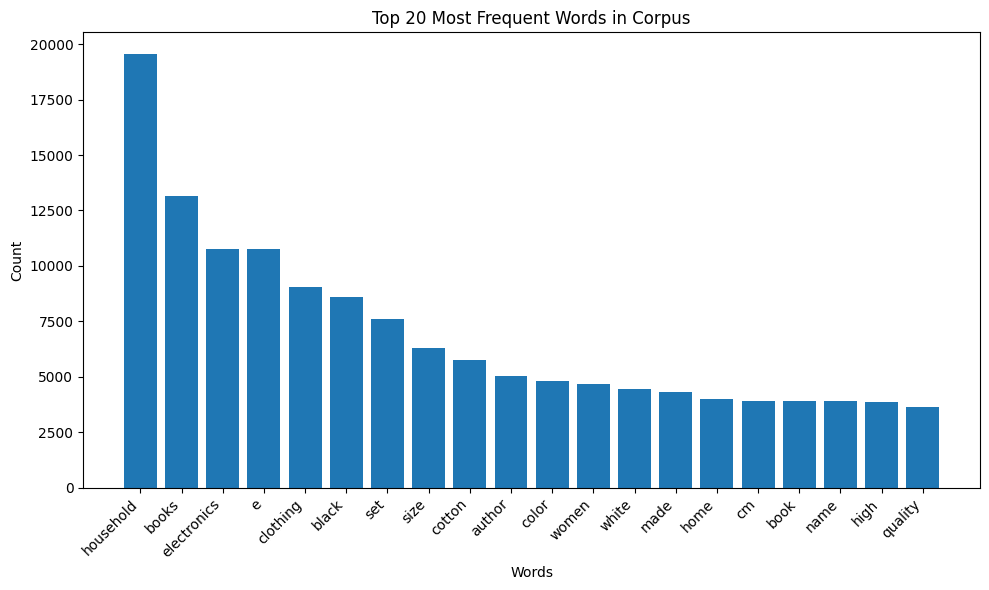

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Assume cleaned_text exists
# Tokenize again (simple split)
tokens = cleaned_text.split()

# Count word frequency
word_counts = Counter(tokens)

# Convert to DataFrame
df = pd.DataFrame(word_counts.items(), columns=["word", "count"])

# Sort to get most frequent words
df_sorted = df.sort_values(by="count", ascending=False).head(20)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_sorted["word"], df_sorted["count"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Most Frequent Words in Corpus")
plt.xlabel("Words")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Objectifs possibles :

Représentation vectorielle des mots / phrases

Clustering produits

Recherche sémantique

Recommandation / similarité

| **Type de modèle**                   | **Exemples**                                               | **Avantages**                                 | **Limites**                                                                   | **Pertinence pour notre projet**                                                                  |
| ------------------------------------ | ---------------------------------------------------------- | --------------------------------------------- | ----------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------- |
| **Word2Vec**                         | `gensim.models.Word2Vec`                                   | Simple, rapide, vectorisation de mots         | Ne capture pas le contexte des phrases, moins performant sur vocabulaire rare | Baseline acceptable pour mots fréquents, mais pas optimal pour titres descriptifs             |
| **FastText**                         | `gensim.models.FastText`                                   | Gère mots rares, sous-mots, out-of-vocab      | Toujours pas contextuel                                                       |  Très utile pour e-commerce où tu as des mots produits uniques ou inventés                     |
| **GloVe**                            | `glove.6B`                                                 | Pré-entraîné sur corpus large                 | Pas contextuel, mots rares mal représentés                                    |  Bonne baseline, mais limité pour corpus spécifique                                            |
| **BERT / Transformers**              | `bert-base-uncased`, `distilbert-base-uncased`             | Contextual embeddings, phrase-aware           | Lourd, nécessite GPU, pas spécifique e-commerce                               |  Excellent pour titres + descriptions, capture le sens complet                                 |
| **Sentence-BERT (SBERT)**            | `all-MiniLM-L6-v2`, `distiluse-base-multilingual-cased-v1` | Optimisé pour phrases, similarity, clustering | Taille embedding fixe (384-512), dépend du modèle choisi                      | Recommandé pour notre projet : embeddings de titres/descriptions, clustering, recherche produit |
| **Universal Sentence Encoder (USE)** | `tensorflow_hub`                                           | Contextual, rapide pour phrases courtes       | Moins flexible que SBERT                                                      |  Alternative SBERT si tu veux TensorFlow                                                       |


**appliquer Sentence-BERT**

Installation et import

In [ ]:
!pip install -q sentence-transformers
from sentence_transformers import SentenceTransformer
import pandas as pd


Charger le modèle SBERT

On utilise all-MiniLM-L6-v2 pour les titres/descriptions e-commerce :

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Vérifier que les descriptions sont propres

In [ ]:
for i, desc in enumerate(descriptions):
    print(f"Description {i+1}: {desc[:150]}...")  # affichage des 150 premiers caractères


Description 1: household paper plane design framed wall hanging motivational office decor art prints inch set painting made synthetic frame uv te tured print gives m...
Description 2: household saf floral framed painting wood inch inch special effect uv print te tured sao painting made synthetic frame uv te tured print gives multi e...
Description 3: household saf uv te tured modern art print framed painting synthetic cm cm cm set color multicolor size cm cm cm overview beautiful painting involves ...
Description 4: household saf flower print framed painting synthetic inch inch uv te tured set sanfsw color multicolor size cm cm cm beautiful painting involves actio...
Description 5: household incredible gifts india wooden happy birthday unique personalized gift inch size made natural imported wood quite solid light particle patter...
Description 6: household photo gifts fabrics balcony interior e terior outdoor gallery hotels restaurants colourful colorful small large e tra large oversi

Cela te permet de vérifier qu’aucune description n’est vide ou tronquée.

**générer les embeddings avec SBERT**

In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Charger le modèle SBERT
model = SentenceTransformer('all-MiniLM-L6-v2')

# Générer les embeddings
embeddings = model.encode(descriptions)

# Vérifier la forme
print("Shape des embeddings :", embeddings.shape)  # devrait être (10, 384)

# Créer un DataFrame avec les embeddings et la description originale
df_embeddings = pd.DataFrame(embeddings)
df_embeddings['description'] = descriptions

# Afficher les 5 premières lignes
df_embeddings.head()


Shape des embeddings : (10, 384)


,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,description
0,-0.033481,0.066874,-0.043473,-0.012772,0.020466,0.024338,-0.033301,-0.006296,-0.072780,-0.032094,...,-0.051133,0.016772,0.008329,0.079744,-0.012446,0.009580,0.058611,0.000846,0.057436,household paper plane design framed wall hangi...
1,-0.036675,-0.011477,-0.037551,-0.033141,0.067044,0.040255,-0.019989,-0.005342,-0.023293,-0.022224,...,-0.053290,0.042677,0.021107,0.083433,-0.013452,0.016205,0.021914,0.015190,0.028003,household saf floral framed painting wood inch...
2,-0.043229,0.052595,-0.046276,-0.043399,-0.005800,0.045024,0.018896,0.004944,-0.133450,0.002017,...,-0.022976,0.030287,0.032775,0.034203,0.023091,-0.003315,0.063986,-0.040666,0.023036,household saf uv te tured modern art print fra...
3,-0.009858,0.012222,-0.025449,-0.035106,0.006840,0.057981,0.010947,-0.011237,-0.085144,-0.029770,...,-0.019692,-0.003143,0.022218,0.056369,0.028180,-0.056189,0.064858,-0.027888,0.024410,household saf flower print framed painting syn...
4,-0.040528,0.036628,0.004179,-0.003529,-0.050837,-0.026334,0.052779,-0.000346,-0.068213,0.056475,...,-0.020853,-0.034892,0.022502,0.094460,-0.045612,0.004845,-0.022565,-0.086043,0.016398,household incredible gifts india wooden happy ...


Chaque ligne = une description produit

Colonnes 0 à 383 = vecteurs embeddings

Colonne description = texte original

c’est ton DataFrame df_embeddings qui contient :

Colonnes 0 à 383 → chaque dimension de l’embedding SBERT (vecteur 384D)

Colonne description → le texte original de ton produit

Ça veut dire que les embeddings ont bien été générés et sont prêts à être utilisés pour clustering, recherche de similarité ou visualisation.

**Clustering (regrouper des produits similaires)**

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 5  # tu peux ajuster selon ton corpus
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_embeddings['cluster'] = kmeans.fit_predict(embeddings)

# Vérifier les clusters
print(df_embeddings[['description','cluster']])


                                         description  cluster
0  household paper plane design framed wall hangi...        2
1  household saf floral framed painting wood inch...        0
2  household saf uv te tured modern art print fra...        0
3  household saf flower print framed painting syn...        0
4  household incredible gifts india wooden happy ...        1
5  household photo gifts fabrics balcony interior...        1
6  household prove raw canvas prints special left...        3
7  household photo gifts fabrics balcony interior...        1
8  household saf ganesh modern art print painting...        0
9  household paintings villa uv te tured modern a...        4


Visualisation des clusters (réduction de dimension avec UMAP)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


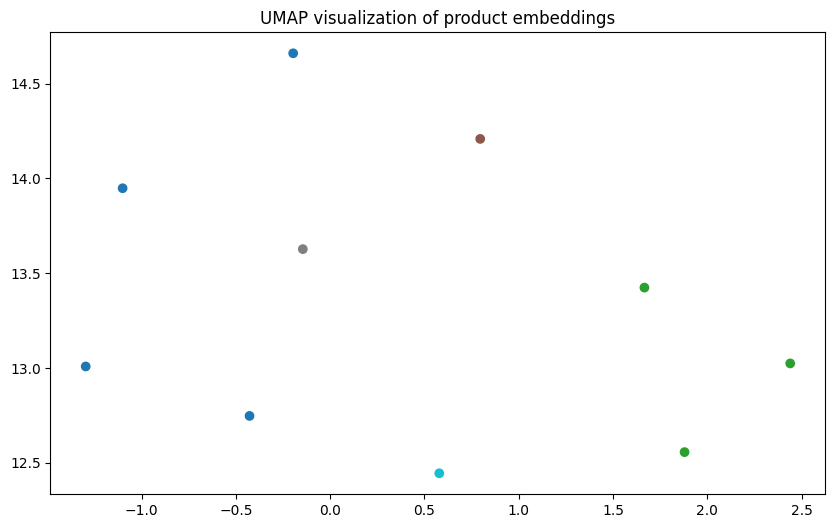

In [ ]:
import umap
import matplotlib.pyplot as plt

# Réduire à 2D
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

# Scatter plot avec couleur selon le cluster
plt.figure(figsize=(10,6))
plt.scatter(embedding_2d[:,0], embedding_2d[:,1], c=df_embeddings['cluster'], cmap='tab10')
plt.title("UMAP visualization of product embeddings")
plt.show()


Quand tu génères des embeddings (comme tes vecteurs SBERT 384D), chaque description produit est représentée dans un espace à 384 dimensions.

Impossible de visualiser directement un espace 384D.

UMAP permet de projeter ces vecteurs dans 2D ou 3D, tout en conservant la structure des distances et similarités.

En pratique :

Produits très similaires → points proches

Produits différents → points éloignés

Ça aide à :

Explorer visuellement ton corpus

Voir des clusters naturels dans les données

Différence avec d’autres méthodes

| Méthode  | Avantages                                                | Limitations                                                    |
| -------- | -------------------------------------------------------- | -------------------------------------------------------------- |
| PCA      | Simple et rapide                                         | Linéaire, ne capture pas la complexité non-linéaire            |
| t-SNE    | Très bon pour clusters locaux                            | Lent pour grands datasets, difficile à interpréter globalement |
| **UMAP** | Rapide, conserve relations locales et globales, scalable | Paramètres peuvent influencer fortement la visualisation       |


Recherche de produits similaires (cosine similarity)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Matrice de similarité
sim_matrix = cosine_similarity(embeddings)

# Exemple : similarité des 3 premières descriptions
print(sim_matrix[:3,:3])


[[0.99999994 0.7922143  0.64572036]
 [0.7922143  1.0000004  0.765815  ]
 [0.64572036 0.765815   0.9999998 ]]


Ce que fait cosine_similarity

La fonction cosine_similarity calcule la similarité cosinus entre tous les vecteurs de ton corpus.

Formellement :

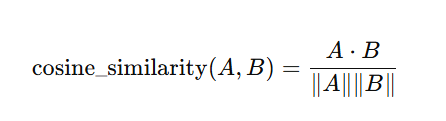


Valeur entre -1 et 1

1 → vecteurs identiques ou très proches dans le sens

0 → vecteurs orthogonaux, pas de similarité

-1 → vecteurs opposés

Chaque ligne = une description

Chaque colonne = une description

sim_matrix[i,j] = similarité entre description i et description j

sim_matrix[0,0] = 0.99999994 → description 0 comparée à elle-même → ~1

sim_matrix[0,1] = 0.7922 → description 0 vs description 1 → assez similaire

sim_matrix[0,2] = 0.6457 → description 0 vs description 2 → moins similaire

Exemple de question

Question :

"Quelle est la similarité entre ce produit :
household paper plane design framed wall hanging motivational office decor art prints inch set painting made synthetic frame uv textured print
et
ce produit :
household saf floral framed painting wood inch inch special effect uv print textured sao painting made synthetic frame uv textured print ?"

**Code pour répondre**

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Charger le modèle SBERT
model = SentenceTransformer('all-MiniLM-L6-v2')

# Deux descriptions à comparer
prod1 = "household paper plane design framed wall hanging motivational office decor art prints inch set painting made synthetic frame uv textured print"
prod2 = "household saf floral framed painting wood inch inch special effect uv print textured sao painting made synthetic frame uv textured print"

# Générer les embeddings
emb1 = model.encode([prod1])
emb2 = model.encode([prod2])

# Calculer la similarité cosinus
similarity = cosine_similarity(emb1, emb2)[0][0]
print(f"Similarité entre les deux produits : {similarity:.3f}")


Similarité entre les deux produits : 0.760


Interprétation

0.9 – 1.0 → produits très similaires

0.7 – 0.9 → produits assez proches (mêmes catégories, styles)

< 0.5 → produits différents

# Modèle basé sur Word2Vec (embeddings par mot)

In [ ]:
!pip install gensim
from gensim.models import Word2Vec

# Tokenisation : chaque description en liste de mots
tokenized_desc = [desc.split() for desc in descriptions]

# Entraînement du modèle Word2Vec sur ton corpus
w2v_model = Word2Vec(sentences=tokenized_desc, vector_size=300, window=5, min_count=1, workers=4)

# Exemple : embedding pour une description (moyenne des mots)
import numpy as np
def sentence_vector(sentence):
    vecs = [w2v_model.wv[word] for word in sentence.split() if word in w2v_model.wv]
    return np.mean(vecs, axis=0)

emb1 = sentence_vector(descriptions[0])
emb2 = sentence_vector(descriptions[1])

# Similarité cosinus
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity([emb1], [emb2])[0][0]
print(f"Similarité (Word2Vec) : {similarity:.3f}")

Similarité (Word2Vec) : 0.689


la similarité entre deux descriptions avec Word2Vec, et le résultat est 0.689, ce qui signifie que les deux produits sont assez similaires lexicalement, mais moins que ce que tu obtiendrais avec SBERT (qui capte mieux le contexte et le sens global de la phrase).

**GloVe (Global Vectors for Word Representation)**

) est un modèle d’embeddings de mots pré-entraîné, comme Word2Vec, mais basé sur les statistiques globales de co-occurrence dans un grand corpus.

Installer et charger GloVe

In [ ]:
import numpy as np

# Télécharger le fichier GloVe si ce n'est pas déjà fait
# Le fichier glove.6B.zip contient des embeddings de différentes dimensions (50d, 100d, 200d, 300d)
# Nous allons utiliser la version 300d.
!wget -nc http://nlp.stanford.edu/data/glove.6B.zip
!unzip -n glove.6B.zip

# Charger GloVe
glove_file_path = "glove.6B.300d.txt"  # le fichier décompressé est dans le répertoire courant

# Créer un dictionnaire : mot → vecteur
glove_embeddings = {}
with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glove_embeddings[word] = vector

print(f"Nombre de mots dans GloVe : {len(glove_embeddings)}")

--2025-11-17 20:26:09--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-11-17 20:26:09--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-11-17 20:26:09--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

**Calculer un embedding pour chaque description**

In [ ]:
def sentence_vector_glove(sentence):
    words = sentence.split()
    vecs = [glove_embeddings[word] for word in words if word in glove_embeddings]
    if len(vecs) == 0:  # si aucun mot trouvé
        return np.zeros(300)
    return np.mean(vecs, axis=0)

# Exemple : embeddings pour 10 descriptions
embeddings_glove = np.array([sentence_vector_glove(desc) for desc in descriptions])
print("Shape des embeddings GloVe :", embeddings_glove.shape)


Shape des embeddings GloVe : (10, 300)


**Calculer la similarité cosinus**

la matrice de similarité cosinus entre tes 3 premières descriptions avec GloVe :

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

sim_matrix_glove = cosine_similarity(embeddings_glove)

# Similarité des 3 premières descriptions
print(sim_matrix_glove[:3, :3])


[[1.0000001  0.91086316 0.75758857]
 [0.91086316 1.0000002  0.78777903]
 [0.75758857 0.78777903 1.0000004 ]]


Interprétation :

Diagonale (1.0) → chaque description est parfaitement similaire à elle-même.

Valeurs hors diagonale → similarité entre deux descriptions différentes.

Exemple : 0.9108 → très similaire

Exemple : 0.7576 → similaire mais moins proche

# tableau de comparaison entre :GloVe, Word2Vec, et SBERT

| Critère / Modèle             | GloVe                                     | Word2Vec                                             | SBERT (all-MiniLM-L6-v2)                                              |
| ---------------------------- | ----------------------------------------- | ---------------------------------------------------- | --------------------------------------------------------------------- |
| **Type d’embedding**         | Statique, basé sur co-occurrences de mots | Statique, basé sur contexte local (skip-gram / CBOW) | Contextuel, basé sur phrases et phrases entières                      |
| **Dimension**                | 50, 100, 200, 300 (selon fichier choisi)  | Configurable (ex: 100-300)                           | 384 (all-MiniLM-L6-v2)                                                |
| **Représentation de phrase** | Moyenne des vecteurs des mots             | Moyenne des vecteurs des mots                        | Embedding direct de phrase ou description complète                    |
| **Capturer la sémantique**   | Limité, dépend du vocabulaire             | Mieux que GloVe, capture relations contextuelles     | Très performant, capture similarité sémantique fine                   |
| **Vitesse de calcul**        | Rapide                                    | Rapide                                               | Moyen, plus lourd que Word2Vec/GloVe                                  |
| **Taille du modèle**         | Petite (quelques centaines Mo)            | Petite à moyenne                                     | Plus grande (≈ 80-120 Mo)                                             |
| **Avantages**                | Facile à utiliser, rapide                 | Capture certaines nuances contextuelles              | Très précis pour recherche produit, clustering, recommandation        |
| **Limites**                  | Ne capture pas le contexte de phrase      | Limité pour phrases longues                          | Plus lourd à calculer, nécessite GPU pour gros corpus                 |
| **Exemple d’usage**          | Similarité globale des mots               | Similarité mot à mot ou phrase courte                | Similarité de titres ou descriptions de produit, recherche sémantique |


Conclusion ⁉Si on veux rapidité et simplicité**, Word2Vec ou GloVe** suffisent pour des prototypes.

Si on veux vraiment capturer la signification des titres/descriptions, **SBERT** est le meilleur choix.